In [19]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
path= Path("cleaned_post_code_registration.csv")
df= pd.read_csv(path)

In [154]:
#total registrations for each fuel type
types= df.groupby("Fuel Type").sum()
types= types.drop(['Postcode','State'],axis=1)
types

,Registrations as at 31 January 2021,Registrations as at 31 January 2022,Registrations as at 31 January 2023
Fuel Type,,,
Battery Electric Vehicle,15943,34133,72710
Hybrid,204146,276128,361654
Hydrogen Cell Vehicle,0,0,0
Internal Combustion Engine,18263272,18534709,18830991


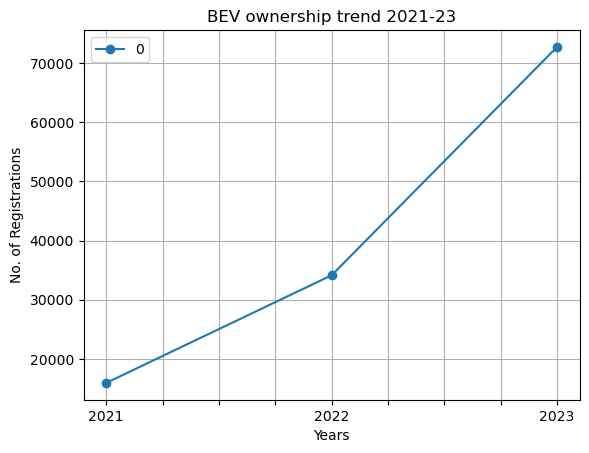

In [175]:
#BEV registration trends

BEV_data= df.loc[df["Fuel Type"]=="Battery Electric Vehicle"]

first_count= BEV_data["Registrations as at 31 January 2021"].sum()
second_count= BEV_data["Registrations as at 31 January 2022"].sum()
third_count= BEV_data["Registrations as at 31 January 2023"].sum()

Total_reg= pd.DataFrame({"2021":[first_count],"2022":second_count,"2023":third_count}).T
Total_reg.plot(marker="o", title= "BEV ownership trend 2021-23", grid=True, label="BEV data")
plt.xlabel("Years")
plt.xticks(rotation= 0)
plt.ylabel("No. of Registrations")
plt.savefig("BEV_ownership.png")
plt.show()

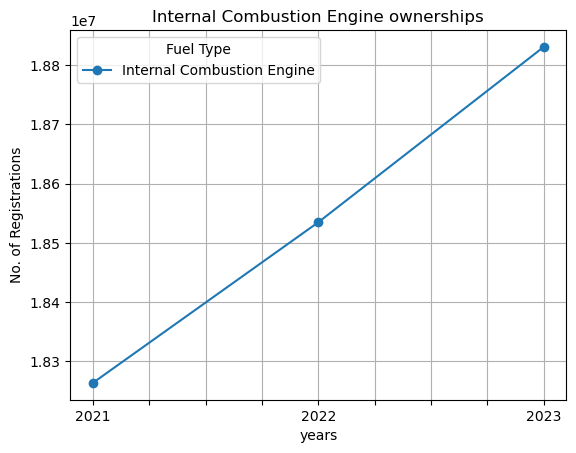

Fuel Type,Internal Combustion Engine
2021,18263272
2022,18534709
2023,18830991


In [176]:
#combustion engine registration trend

ICE= df.loc[(df["Fuel Type"]=="Internal Combustion Engine"),:]
Total= ICE.groupby("Fuel Type").sum()
renamed= Total.rename(columns={"Registrations as at 31 January 2021":"2021",
                           "Registrations as at 31 January 2022":"2022",
                           "Registrations as at 31 January 2023":"2023"})
                    
fuel_type= renamed[["2021","2022","2023"]].T

fuel_type.plot(marker="o", grid=True)
plt.title("Internal Combustion Engine ownerships")
plt.xlabel("years")
plt.xticks(rotation= 0)
plt.ylabel("No. of Registrations")
plt.savefig("internal_combustion_ownership")
plt.show()
fuel_type

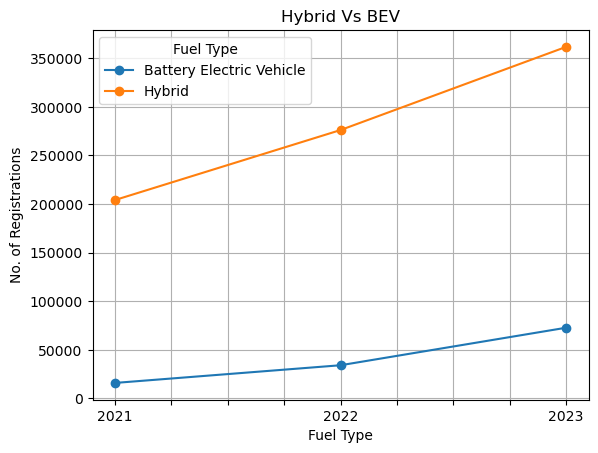

Fuel Type,Battery Electric Vehicle,Hybrid
2021,15943,204146
2022,34133,276128
2023,72710,361654


In [177]:
#BEV & Hybrid registration trend

Hybrid_BEV= df.loc[(df["Fuel Type"]=="Battery Electric Vehicle")|(df["Fuel Type"]=="Hybrid"),:]
fuel_types= Hybrid_BEV.groupby("Fuel Type").sum()
renamed= fuel_types.rename(columns={"Registrations as at 31 January 2021":"2021",
                           "Registrations as at 31 January 2022":"2022",
                           "Registrations as at 31 January 2023":"2023"})
                    
fuel_type= renamed[["2021","2022","2023"]].T

fuel_type.plot(marker="o", grid=True)
plt.title("Hybrid Vs BEV")
plt.xlabel("Fuel Type")
plt.xticks(rotation= 0)
plt.ylabel("No. of Registrations")
plt.savefig("Type_comparison")
plt.show()
fuel_type

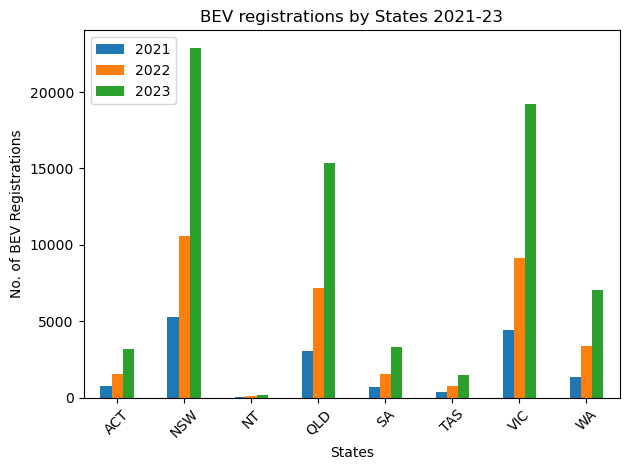

,2021,2022,2023
State,,,
ACT,728,1556,3201
NSW,5264,10552,22900
NT,41,77,161
QLD,3030,7180,15350
SA,691,1525,3306
TAS,389,775,1498
VIC,4425,9117,19254
WA,1375,3351,7040


In [178]:
#State BEV registrations comparison 

State_BEV= BEV_data.groupby("State").sum()
State_totals= State_BEV[["Registrations as at 31 January 2021","Registrations as at 31 January 2022",
                         "Registrations as at 31 January 2023"]]
renamed= State_totals.rename(columns={"Registrations as at 31 January 2021":"2021",
                           "Registrations as at 31 January 2022":"2022",
                           "Registrations as at 31 January 2023":"2023"})

renamed.plot(kind= "bar", title="BEV registrations by States 2021-23")
plt.xlabel("States")
plt.xticks(rotation= 45)
plt.ylabel("No. of BEV Registrations")
plt.tight_layout()
plt.savefig("States_comparison")
plt.show()

renamed